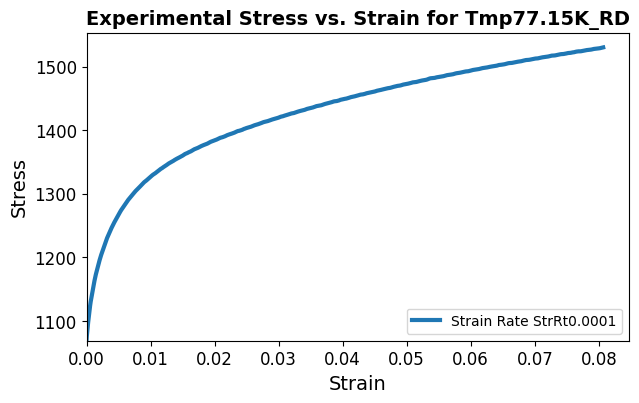

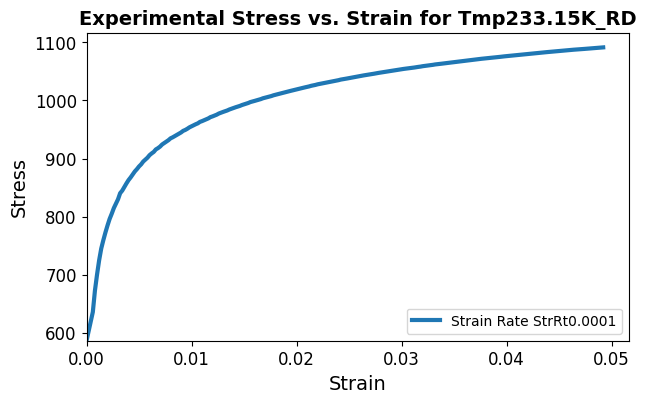

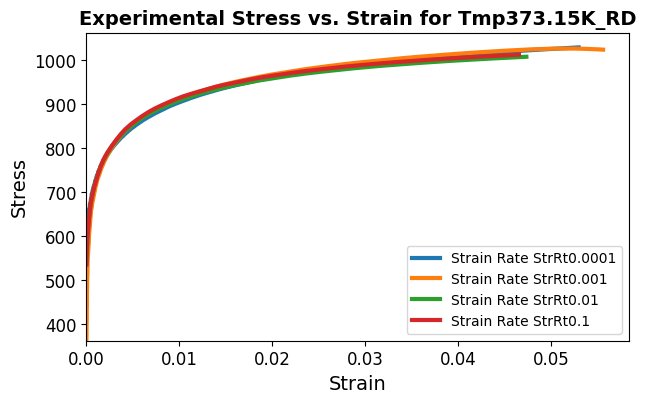

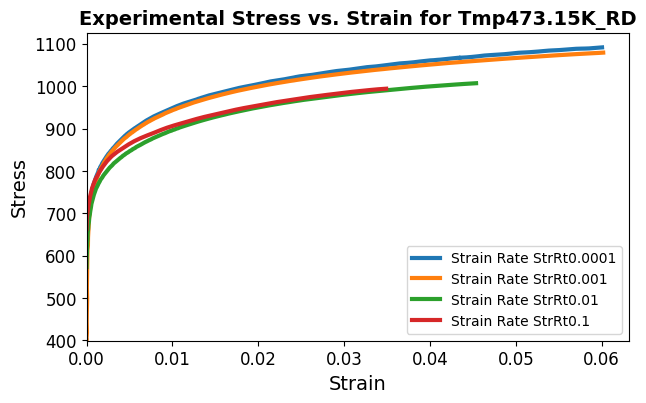

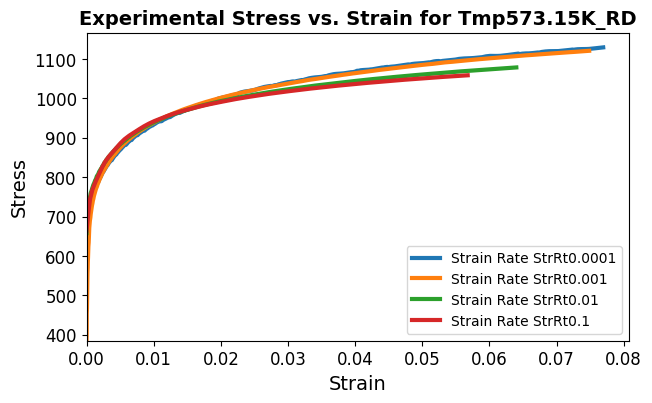

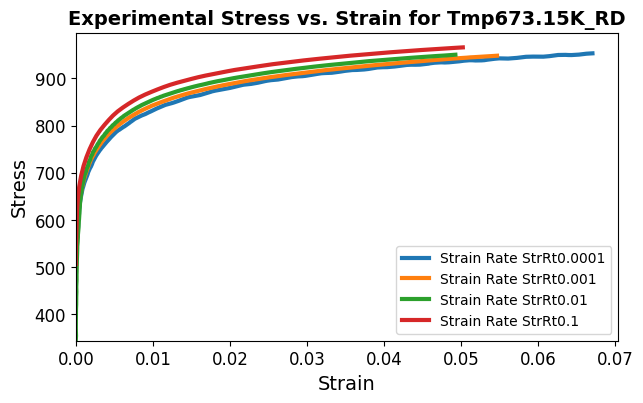

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
excel_path = 'Exp_FC_StrRtDpn_TmpDpn.xlsx'
excel_data = pd.ExcelFile(excel_path)

# Get all sheet names
sheet_names = excel_data.sheet_names

# Exclude sheets containing "298" in their names
sheets_to_plot = [sheet for sheet in sheet_names if "298" not in sheet]

# Plot for each valid sheet individually
for sheet in sheets_to_plot:
    data = pd.read_excel(excel_path, sheet_name=sheet)
    
    # Grouping by strain rate (e.g., "StrRt0.0001")
    strain_rates = sorted(set(col.split('_')[1] for col in data.columns if '_E' in col))
    
    # Initialize the plot for the sheet
    plt.figure(figsize=(7, 4))
    
    min_x, min_y = float('inf'), float('inf')
    
    for strain_rate in strain_rates:
        e_cols = [col for col in data.columns if f"_{strain_rate}_" in col and col.endswith('_E')]
        s_cols = [col for col in data.columns if f"_{strain_rate}_" in col and col.endswith('_S')]
        for e_col, s_col in zip(e_cols, s_cols):
            plt.plot(data[e_col], data[s_col], label=f"Strain Rate {strain_rate}", linewidth=3)  # Adjust thickness here
            min_x = min(min_x, data[e_col].min())
            min_y = min(min_y, data[s_col].min())
    
    # Customize the plot
    plt.xlabel('Strain', fontsize=14)
    plt.ylabel('Stress', fontsize=14)
    plt.title(f'Experimental Stress vs. Strain for {sheet}', fontsize=14, fontweight='bold')
    plt.xlim(left=min_x)
    plt.ylim(bottom=min_y)
    plt.legend(loc='lower right', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()


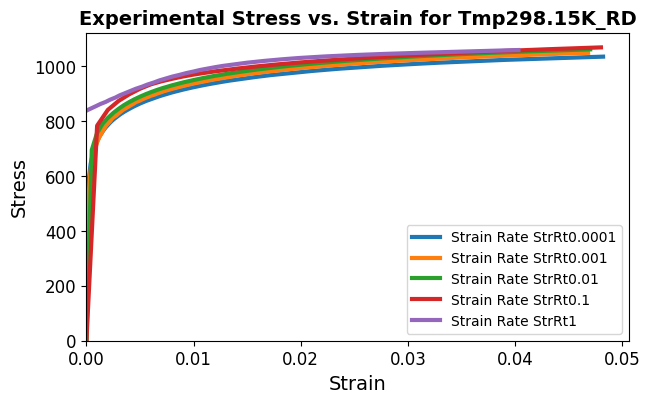

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
excel_path = 'Exp_FC_StrRtDpn_TmpDpn.xlsx'
sheet_name = 'Tmp298.15K_RD-DD-TD'  # Specify the sheet name

# Read the data from the specified sheet
data = pd.read_excel(excel_path, sheet_name=sheet_name)

# Filter columns that contain "RD"
rd_columns = [col for col in data.columns if "RD" in col]

# Extract strain rates from column names (e.g., "StrRt0.0001")
strain_rates = sorted(set(col.split('_')[1] for col in rd_columns if '_E' in col))

# Initialize the plot for the sheet
plt.figure(figsize=(7, 4))

min_x, min_y = float('inf'), float('inf')

# Plot data for each strain rate
for strain_rate in strain_rates:
    e_cols = [col for col in rd_columns if f"_{strain_rate}_" in col and col.endswith('_E')]
    s_cols = [col for col in rd_columns if f"_{strain_rate}_" in col and col.endswith('_S')]
    for e_col, s_col in zip(e_cols, s_cols):
        plt.plot(data[e_col], data[s_col], label=f"Strain Rate {strain_rate}", linewidth=3)  # Adjust thickness here
        min_x = min(min_x, data[e_col].min())
        min_y = min(min_y, data[s_col].min())

# Customize the plot
plt.xlabel('Strain', fontsize=14)
plt.ylabel('Stress', fontsize=14)
plt.title(f'Experimental Stress vs. Strain for Tmp298.15K_RD', fontsize=14, fontweight='bold')
plt.xlim(left=min_x)
plt.ylim(bottom=min_y)
plt.legend(loc='lower right', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()
